In [2]:
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn
from pandas import read_csv, to_numeric
from pandas.tools.plotting import scatter_matrix
from math import log

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
restaurants = read_csv('../data/restaurants.csv', header=0)

In [3]:
restaurants.columns

Index(['Unnamed: 0', 'bus_id', 'median_age', 'avg_hshld', 'pop_skqm',
       'mortg_skqm', 'hmown_sqkm', 'rent_sqkm', 'hshld_sqkm', 'fmly_sqkm',
       'sngl_sqkm', 'hisp_sqkm', 'white_sqkm', 'black_sqkm', 'natam_sqkm',
       'asian_sqkm', 'med_hm_val', 'med_income', 'ed_hs_sqkm', 'ed_ug_sqkm',
       'ed_pg_sqkm', 'address', 'name', 'beer_wine', 'full_bar', 'price_rng',
       'attire', 'takeout', 'waiter_svc', 'outdr_seat', 'uniqueness',
       'sentiment', 'revw_span', 'review_count', 'stars', 'cost', 'atmosphere',
       'location', 'food', 'alcohol', 'time', 'people', 'service', 'opinion',
       'rating', 'geometry', 'dist_CBD', 'near_exit', 'num_cmptrs'],
      dtype='object')

## Response Variables

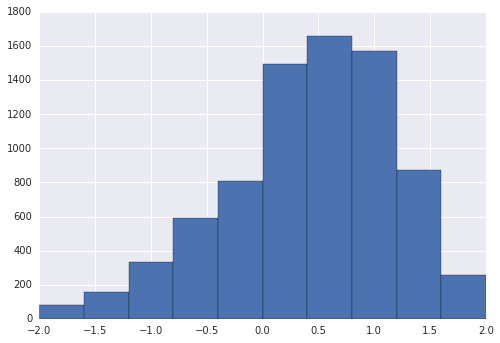

In [4]:
plot.figure()
restaurants['stars'].apply(lambda stars: stars - 3).hist()

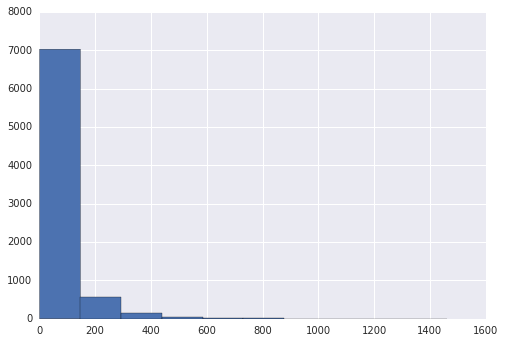

In [5]:
plot.figure()
restaurants['review_count'].hist()

In [6]:
restaurants['log_review_count'] = restaurants['review_count'].apply(lambda count: log(count))

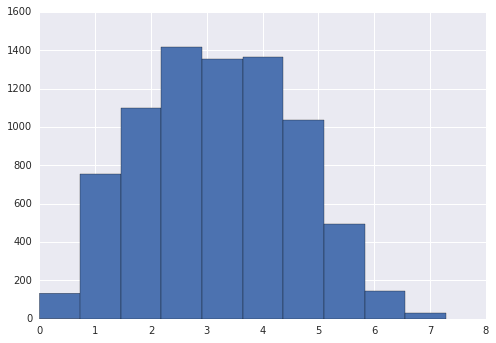

In [7]:
plot.figure()
restaurants['log_review_count'].hist()

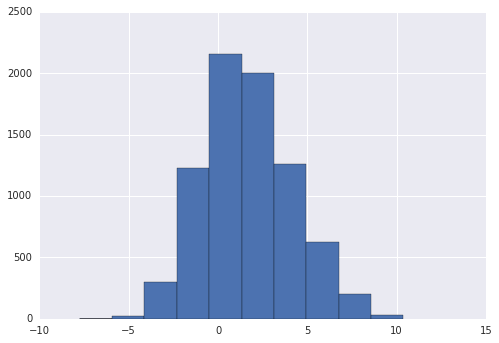

In [8]:
plot.figure()
restaurants['rating'].hist()

## Calculated Predictor Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedd0e2bc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedd08cbcf8>]], dtype=object)

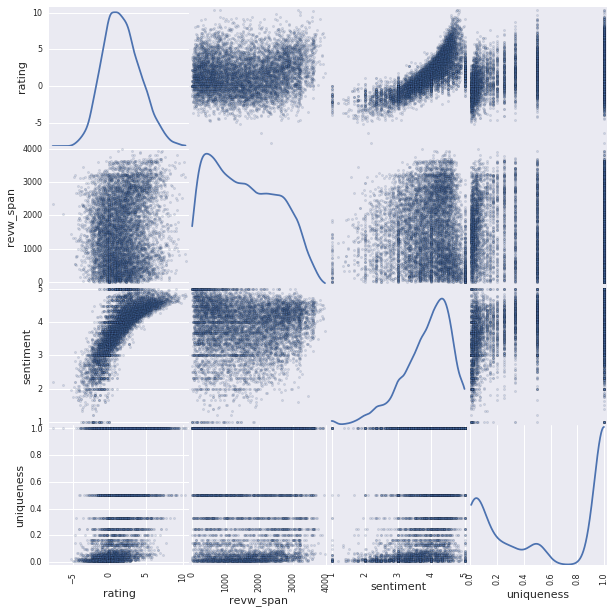

In [117]:
scatter_matrix(restaurants[['rating', 'revw_span', 'sentiment', 'uniqueness']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Review Span

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


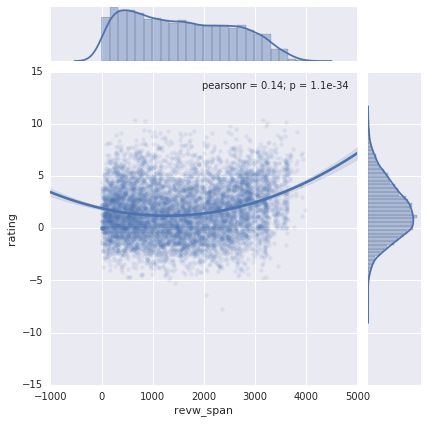

In [118]:
seaborn.jointplot(x='revw_span', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


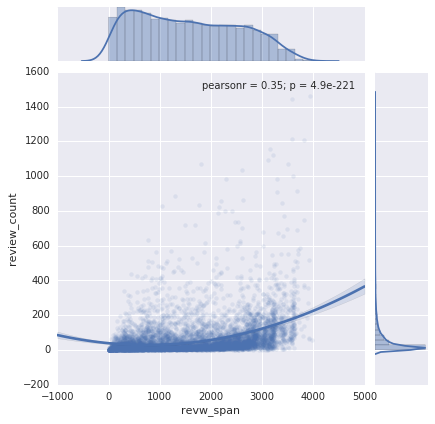

In [119]:
seaborn.jointplot(x='revw_span', y='review_count',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [120]:
restaurants['log_revw_span'] = restaurants['revw_span'].apply(lambda span: log(span + 1))

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


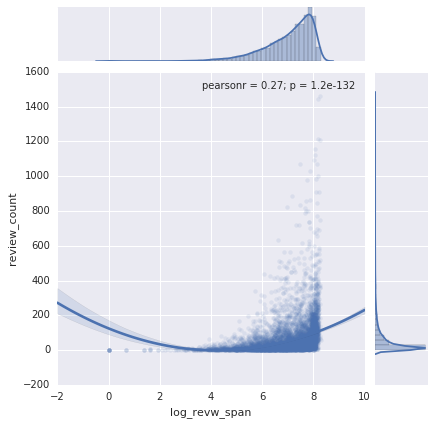

In [122]:
seaborn.jointplot(x='log_revw_span', y='review_count',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Sentiment

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


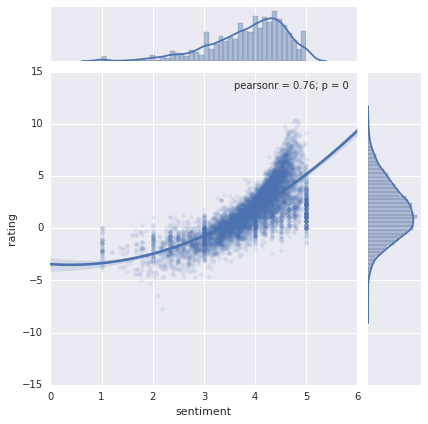

In [108]:
seaborn.jointplot(x='sentiment', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [35]:
restaurants['sq_sentiment'] = restaurants['sentiment']**2.0

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


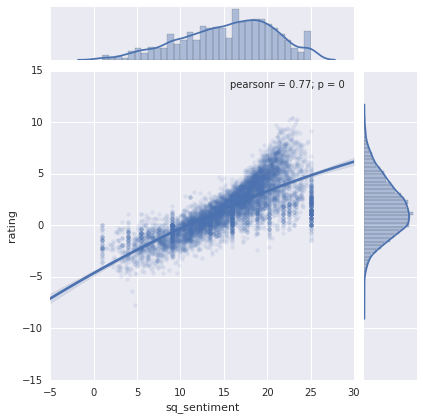

In [36]:
seaborn.jointplot(x='sq_sentiment', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Uniqueness

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


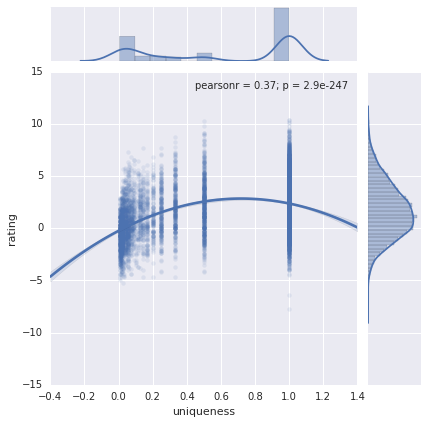

In [113]:
seaborn.jointplot(x='uniqueness', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [31]:
restaurants['log_uniqueness'] = (restaurants['uniqueness'].apply(lambda score: log(score)))

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


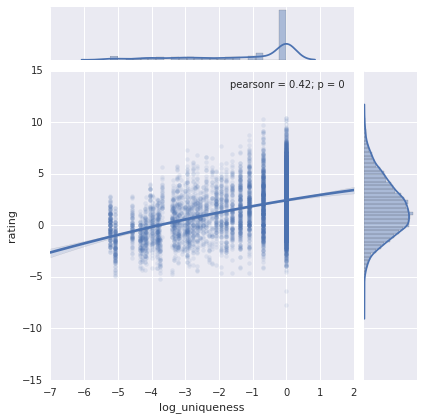

In [32]:
seaborn.jointplot(x='log_uniqueness', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

## Spatial Predictor Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedd0272ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedd1f04400>]], dtype=object)

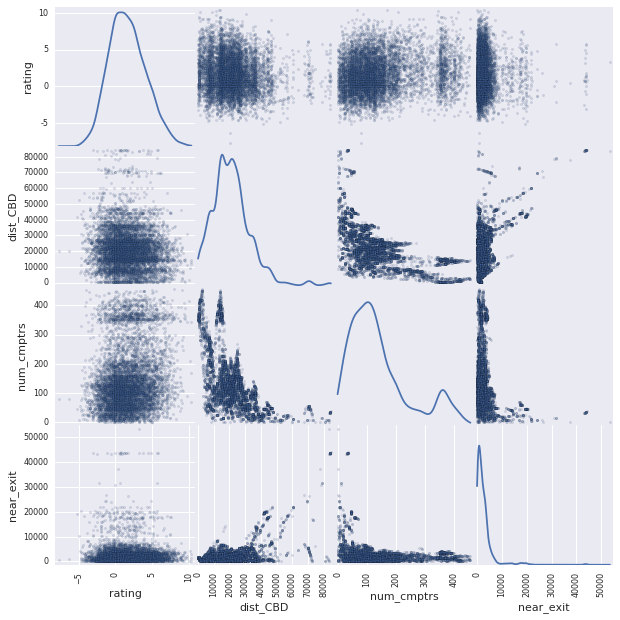

In [123]:
scatter_matrix(restaurants[['rating', 'dist_CBD', 'num_cmptrs', 'near_exit']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Distance from CBD

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


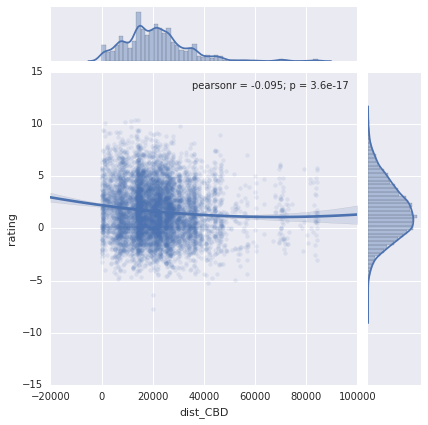

In [124]:
seaborn.jointplot(x='dist_CBD', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [33]:
restaurants['sqrt_dist_CBD'] = restaurants['dist_CBD']**0.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


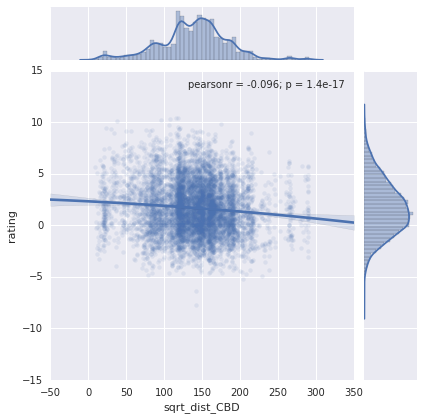

In [34]:
seaborn.jointplot(x='sqrt_dist_CBD', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Number of Competitors (within market area)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


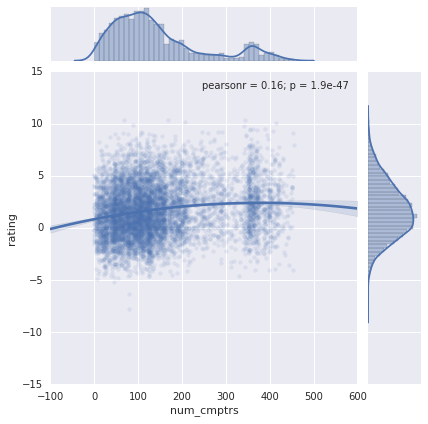

In [128]:
seaborn.jointplot(x='num_cmptrs', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [129]:
restaurants['sqrt_num_cmptrs'] = restaurants['num_cmptrs']**0.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


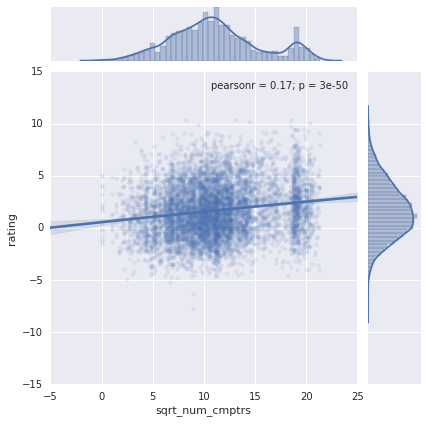

In [130]:
seaborn.jointplot(x='sqrt_num_cmptrs', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Distance from Nearest Motorway Exit

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


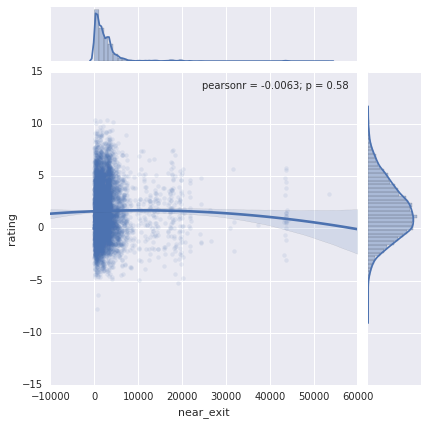

In [131]:
seaborn.jointplot(x='near_exit', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [132]:
restaurants['sqrt_near_exit'] = restaurants['near_exit']**(1/2) 

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


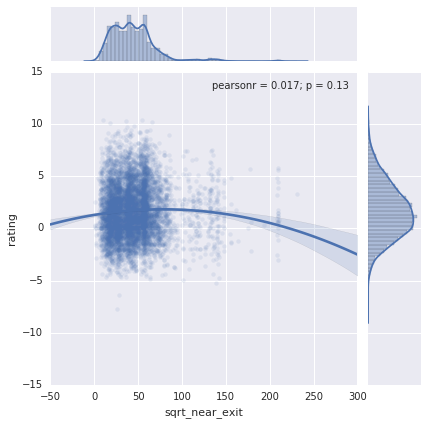

In [133]:
seaborn.jointplot(x='sqrt_near_exit', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [134]:
restaurants['log_near_exit'] = restaurants['near_exit'].apply(lambda dist: log(dist)) 

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


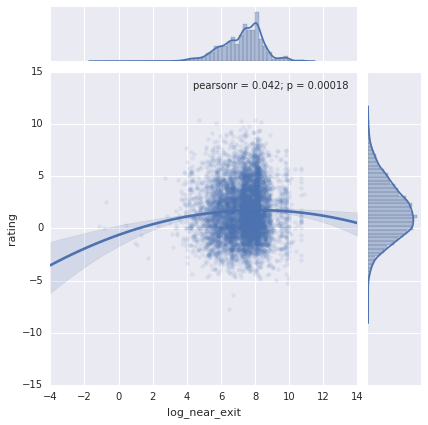

In [135]:
seaborn.jointplot(x='log_near_exit', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

## Demographic Predictor Variables

### Age & Population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc789fe80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc740cda0>]], dtype=object)

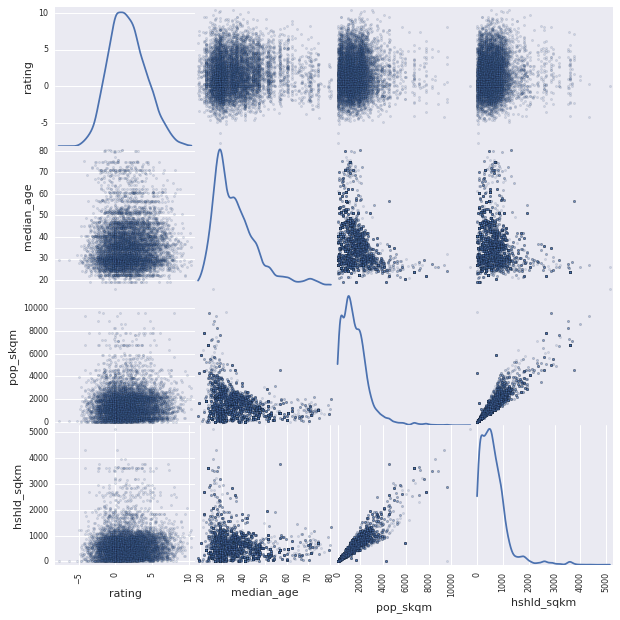

In [140]:
scatter_matrix(restaurants[['rating', 'median_age', 'pop_skqm', 'hshld_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [209]:
restaurants[['log_median_age', 'log_pop_skqm', 'log_hshld_sqkm']] = \
    (restaurants[['median_age', 'pop_skqm', 'hshld_sqkm']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc2125400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc1b8ca58>]], dtype=object)

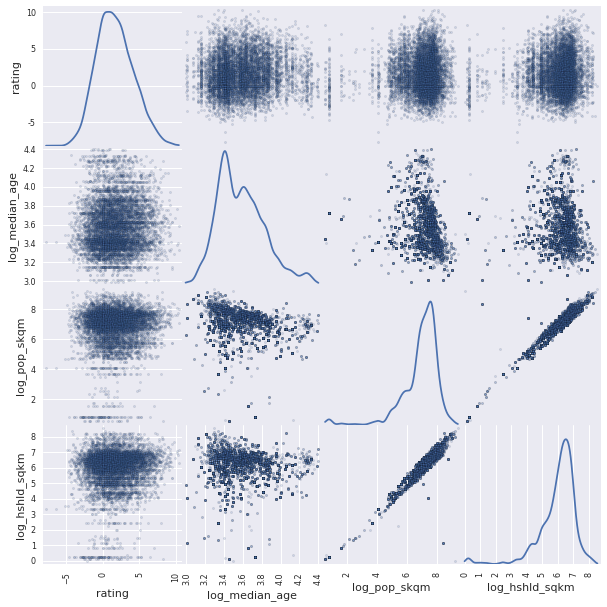

In [210]:
scatter_matrix(restaurants[['rating', 'log_median_age', 'log_pop_skqm', 'log_hshld_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

#### Median Age

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


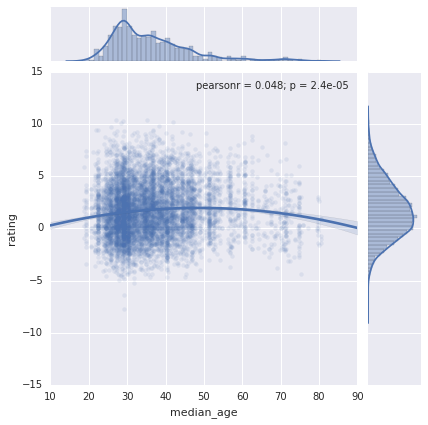

In [142]:
seaborn.jointplot(x='median_age', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [145]:
restaurants['sqrt_median_age'] = restaurants['median_age']**(1/2)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


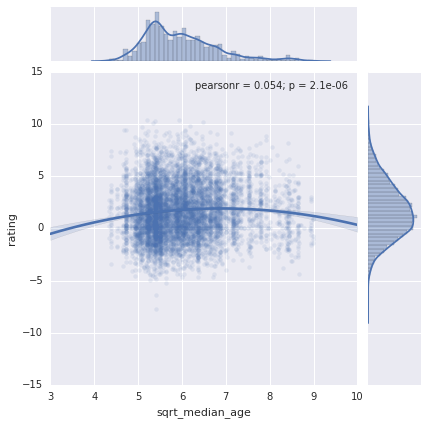

In [146]:
seaborn.jointplot(x='sqrt_median_age', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

#### Population Density

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


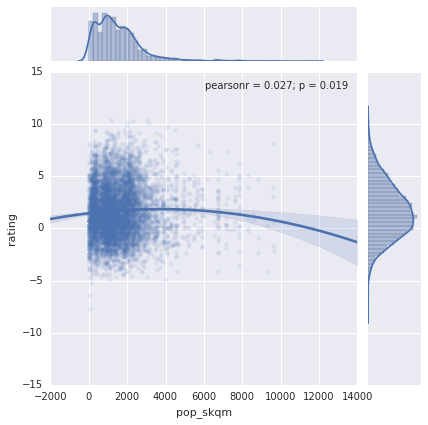

In [147]:
seaborn.jointplot(x='pop_skqm', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [152]:
restaurants['sqrt_pop_skqm'] = restaurants['pop_skqm']**(1/2)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


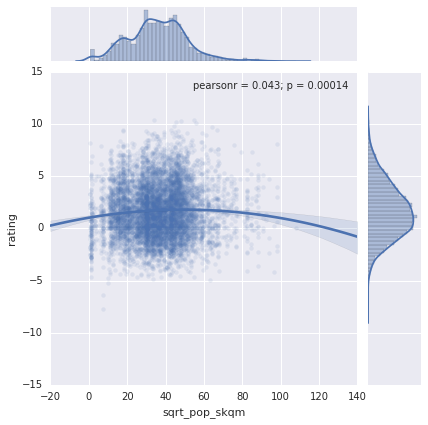

In [153]:
seaborn.jointplot(x='sqrt_pop_skqm', y='rating',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Home Ownership, Renters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc7ea7a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc79ea1d0>]], dtype=object)

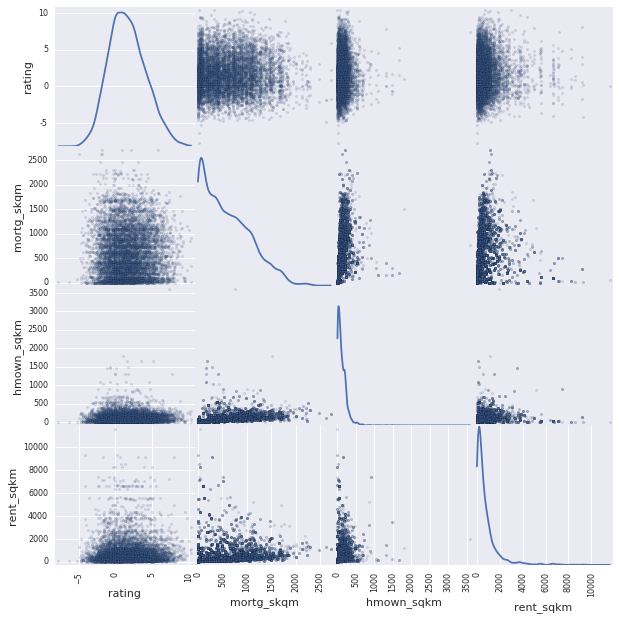

In [139]:
scatter_matrix(restaurants[['rating', 'mortg_skqm', 'hmown_sqkm', 'rent_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [211]:
restaurants[['log_mortg_skqm', 'log_hmown_sqkm', 'log_rent_sqkm']] = \
    (restaurants[['mortg_skqm', 'hmown_sqkm', 'rent_sqkm']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc1b41be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc1228668>]], dtype=object)

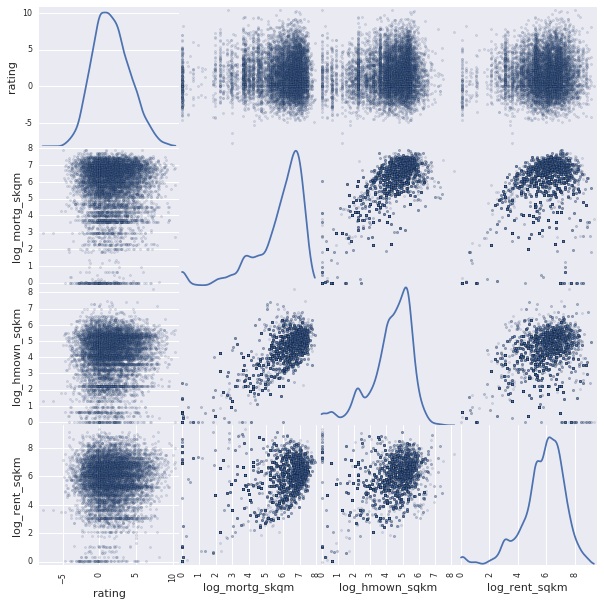

In [213]:
scatter_matrix(restaurants[['rating', 'log_mortg_skqm', 'log_hmown_sqkm', 'log_rent_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Household Size, Type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc74692e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc6eaa828>]], dtype=object)

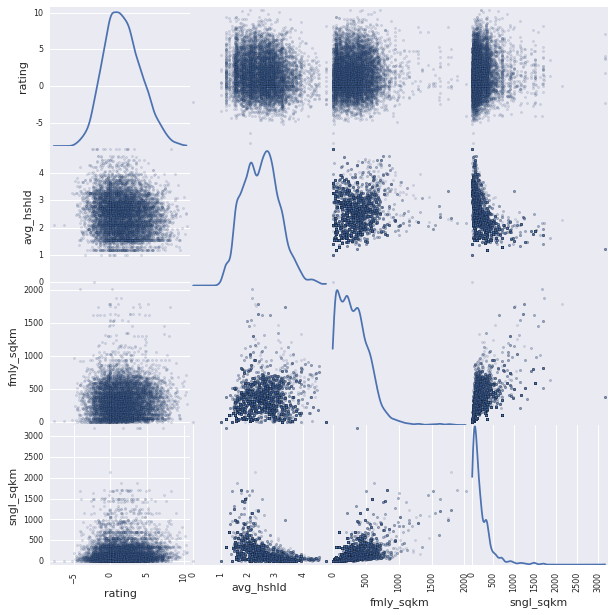

In [141]:
scatter_matrix(restaurants[['rating', 'avg_hshld', 'fmly_sqkm', 'sngl_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [207]:
restaurants[['log_avg_hshld', 'log_fmly_sqkm', 'log_sngl_sqkm']] = \
    (restaurants[['avg_hshld', 'fmly_sqkm', 'sngl_sqkm']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3099ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc215cc88>]], dtype=object)

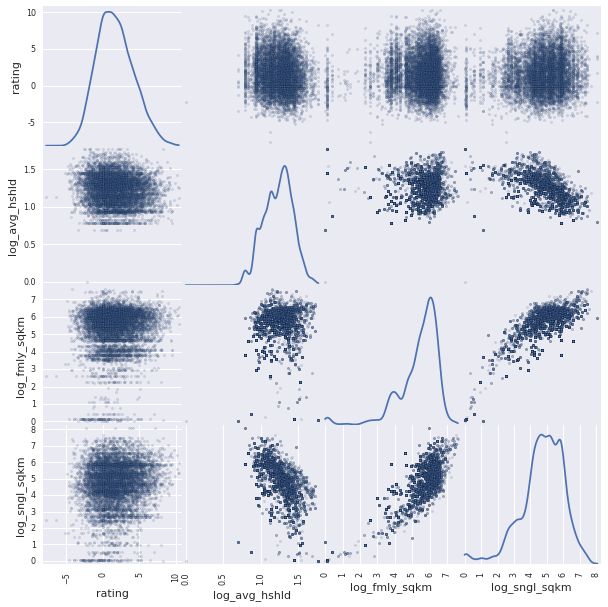

In [208]:
scatter_matrix(restaurants[['rating', 'log_avg_hshld', 'log_fmly_sqkm', 'log_sngl_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Race & Ethnicity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc5ce6048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc52e5e10>]], dtype=object)

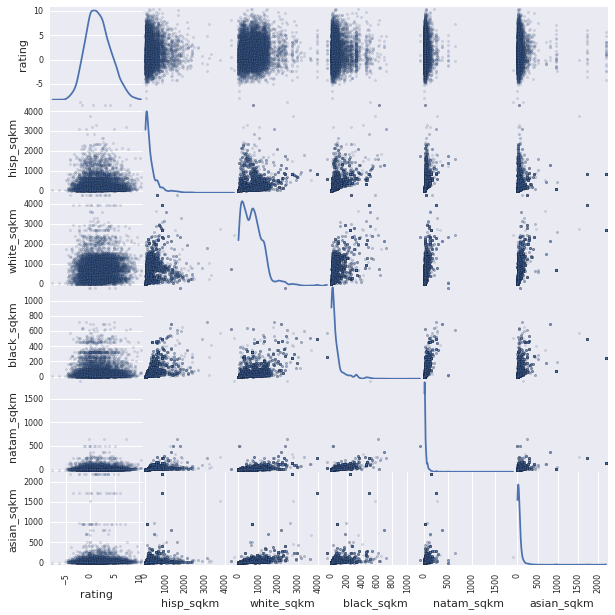

In [154]:
scatter_matrix(restaurants[['rating', 'hisp_sqkm', 'white_sqkm', 'black_sqkm', 'natam_sqkm', 'asian_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [204]:
restaurants[['log_hisp_sqkm', 'log_white_sqkm', 'log_black_sqkm', 'log_natam_sqkm', 
             'log_asian_sqkm']
           ] = \
    (restaurants[['hisp_sqkm', 'white_sqkm', 'black_sqkm', 'natam_sqkm', 'asian_sqkm']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3106898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc26162e8>]], dtype=object)

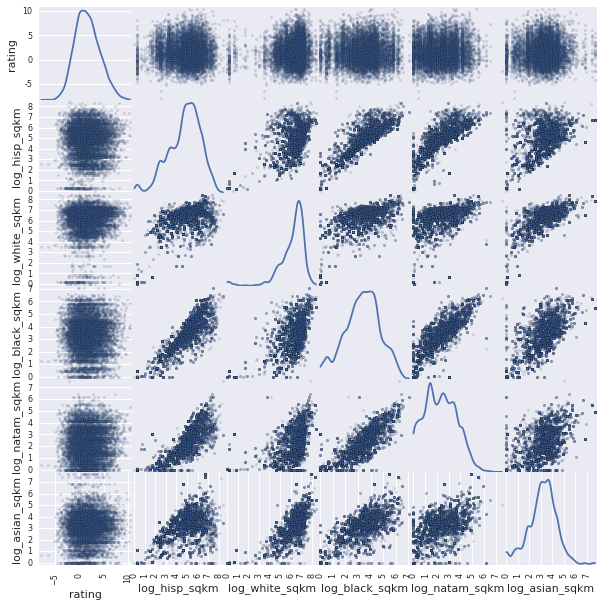

In [205]:
scatter_matrix(restaurants[['rating', 'log_hisp_sqkm', 'log_white_sqkm', 'log_black_sqkm', 
                            'log_natam_sqkm', 'log_asian_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Wealth & Income

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3ef7cc0>]], dtype=object)

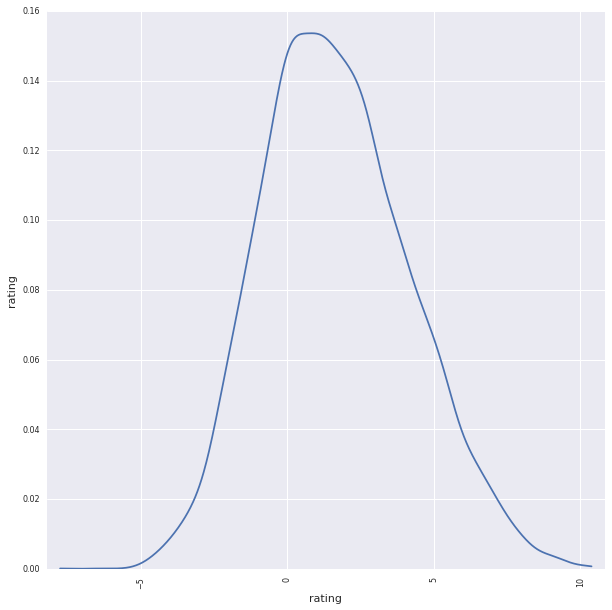

In [197]:
scatter_matrix(restaurants[['rating', 'med_hm_val', 'med_income']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [206]:
restaurants[['log_med_hm_val', 'log_med_income']] = \
    (restaurants[['med_hm_val', 'med_income']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3ef7cc0>]], dtype=object)

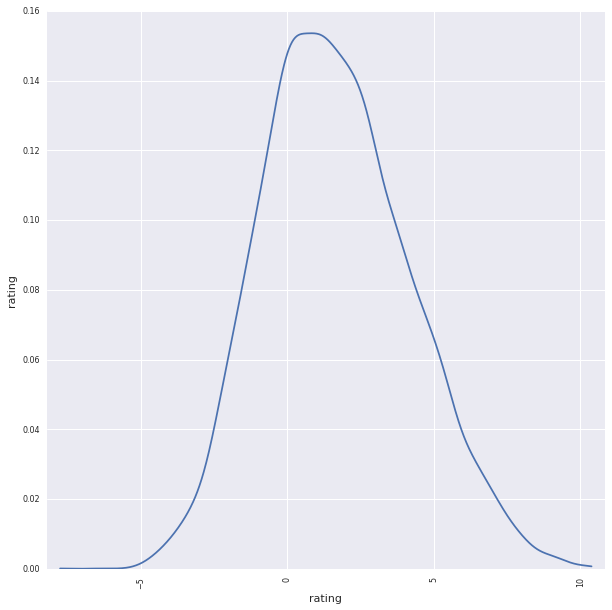

In [197]:
scatter_matrix(restaurants[['rating', 'log_med_hm_val', 'log_med_income']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Education

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3ec3470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3a8b9e8>]], dtype=object)

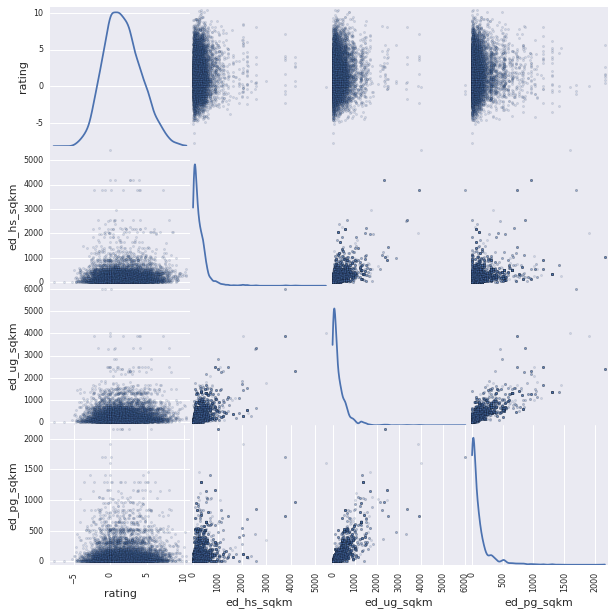

In [198]:
scatter_matrix(restaurants[['rating', 'ed_hs_sqkm', 'ed_ug_sqkm','ed_pg_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [206]:
restaurants[['log_ed_hs_sqkm', 'log_ed_ug_sqkm','log_ed_pg_sqkm']] = \
    (restaurants[['ed_hs_sqkm', 'ed_ug_sqkm','ed_pg_sqkm']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3580128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedc3184a90>]], dtype=object)

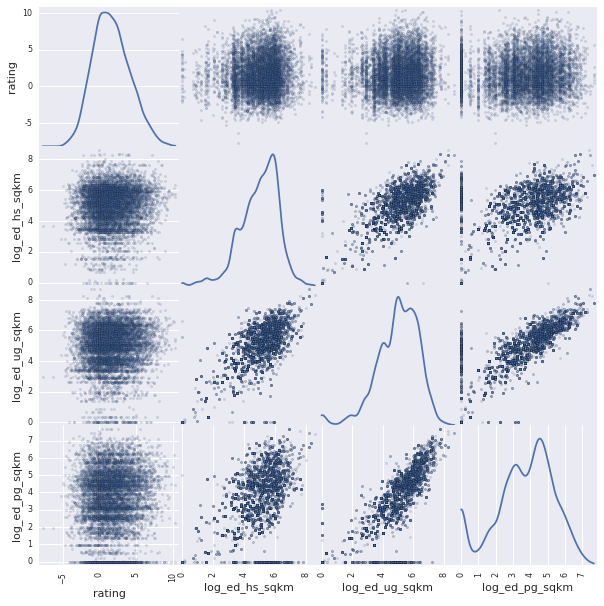

In [202]:
scatter_matrix(restaurants[['rating', 'log_ed_hs_sqkm', 'log_ed_ug_sqkm','log_ed_pg_sqkm']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

## Restaurant Attribute Predictor Variables

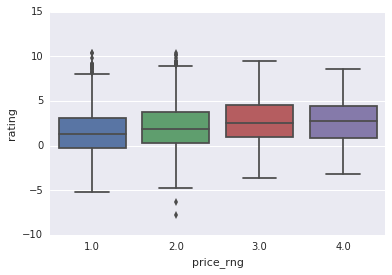

In [17]:
seaborn.boxplot(restaurants['price_rng'], restaurants['rating'])

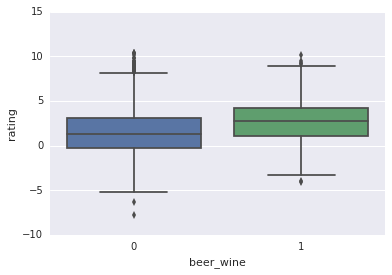

In [88]:
seaborn.boxplot(restaurants['beer_wine'], restaurants['rating'])

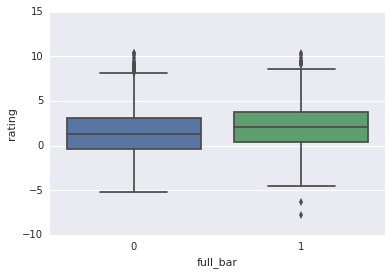

In [89]:
seaborn.boxplot(restaurants['full_bar'], restaurants['rating'])

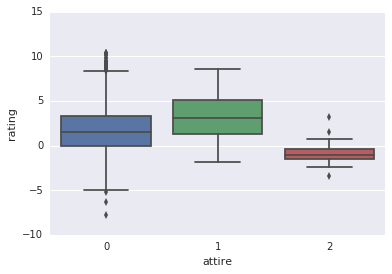

In [90]:
seaborn.boxplot(restaurants['attire'], restaurants['rating'])

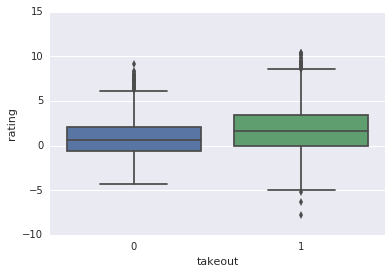

In [91]:
seaborn.boxplot(restaurants['takeout'], restaurants['rating'])

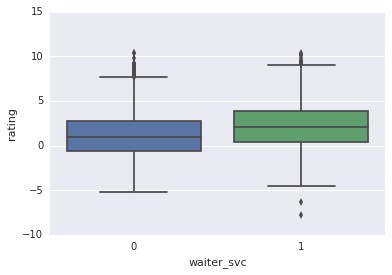

In [92]:
seaborn.boxplot(restaurants['waiter_svc'], restaurants['rating'])

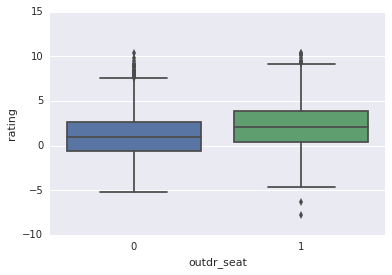

In [93]:
seaborn.boxplot(restaurants['outdr_seat'], restaurants['rating'])

## Topic Sentiment Predictor Variables

### Service, Food, Cost, and Atmosphere

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedbec95160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedbe5234e0>]], dtype=object)

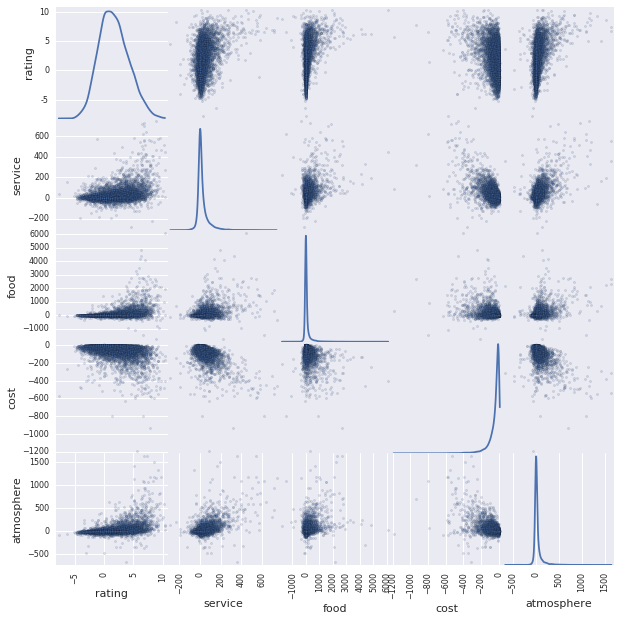

In [215]:
scatter_matrix(restaurants[['rating', 'service', 'food', 'cost', 'atmosphere']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [25]:
restaurants[['log_service', 'log_food', 'log_cost', 'log_atmosphere']] = \
    (restaurants[['service', 'food', 'cost', 'atmosphere']]
     .applymap(lambda value: (value+1e5)**(1/6))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb7cef2da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbb7d7ece10>]], dtype=object)

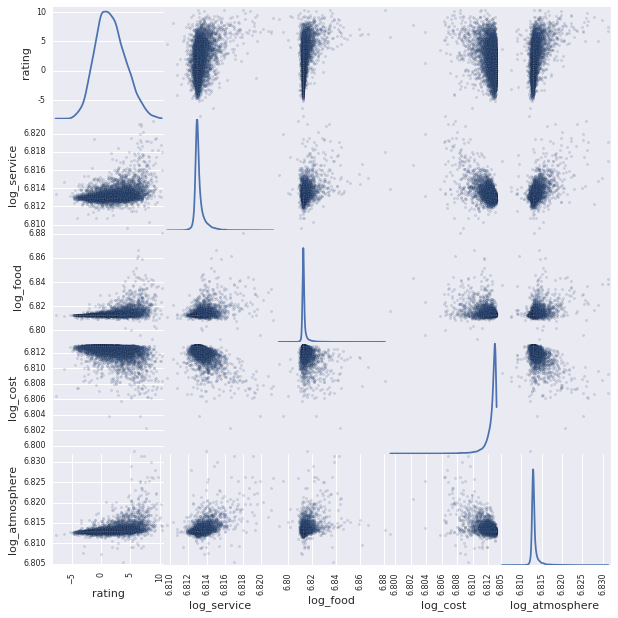

In [26]:
scatter_matrix(restaurants[['rating', 'log_service', 'log_food', 'log_cost', 'log_atmosphere']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Location, Alcohol, Time, People, and Opinion

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedbe3b9e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedbd9cd160>]], dtype=object)

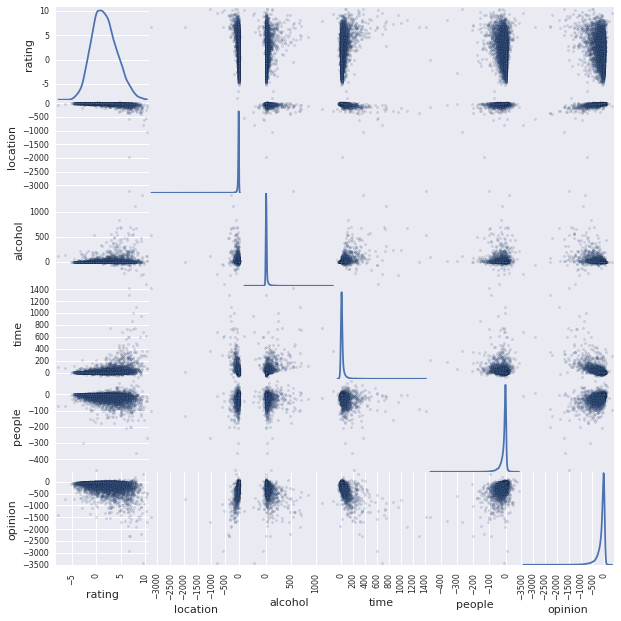

In [216]:
scatter_matrix(restaurants[['rating', 'location', 'alcohol', 'time', 'people', 'opinion']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [233]:
restaurants[['log_location', 'log_alcohol', 'log_time', 'log_people', 'log_opinion']] = \
    (restaurants[['location', 'alcohol', 'time', 'people', 'opinion']]
     .applymap(lambda value: log(value + 1e4))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedba004fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fedb91782b0>]], dtype=object)

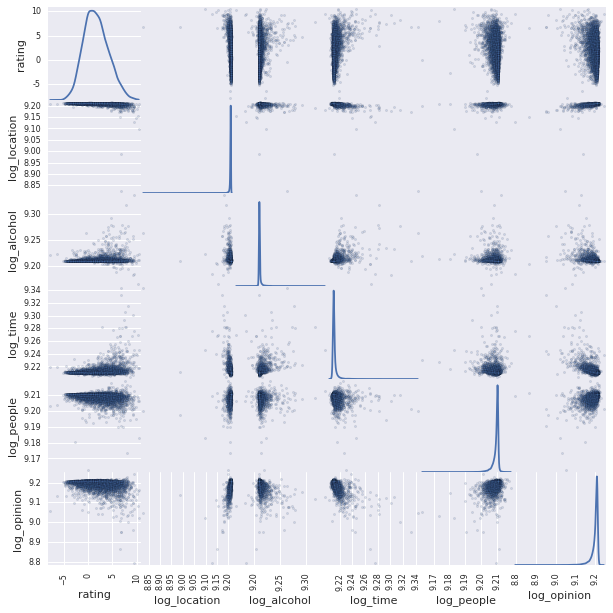

In [234]:
scatter_matrix(restaurants[['rating', 'log_location', 'log_alcohol', 'log_time', 
                            'log_people', 'log_opinion'
                          ]], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )